In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('prostate_analysis_results.csv')

X_age = data[['age']].values  # Explanatory variable 'age'
X_lpsa = data[['lpsa']].values  # Explanatory variable 'lpsa'
y_lweight = data['lweight'].values  # Response variable 'lweight'

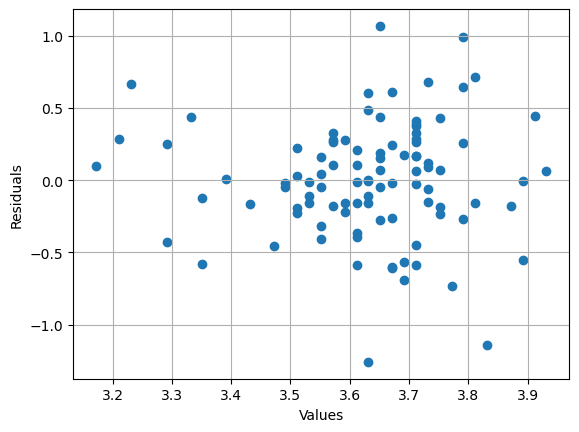

LWeight = 2.350151610081719 + 0.020023039842142577 * Age


In [36]:
#Linear Regression for age
model_age = LinearRegression().fit(X_age, y_lweight)
y_pred_age = model_age.predict(X_age)
residuals_age = data['lweight'] - y_pred_age

plt.scatter(y_pred_age, residuals_age)
plt.xlabel('Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

print("LWeight =", model_age.intercept_, "+", model_age.coef_[0], "* Age")


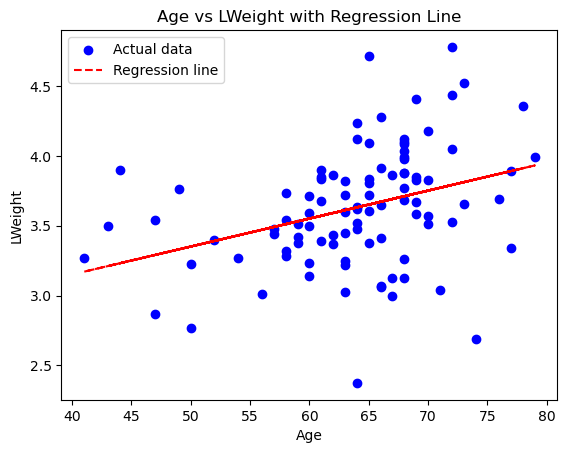

In [15]:
# age plot
plt.scatter(X_age, y_lweight, color='blue', label='Actual data')
plt.plot(X_age, y_pred_age, color='red', linestyle='--', label='Regression line')
plt.xlabel('Age')
plt.ylabel('LWeight')
plt.title('Age vs LWeight with Regression Line')
plt.legend()
plt.show()

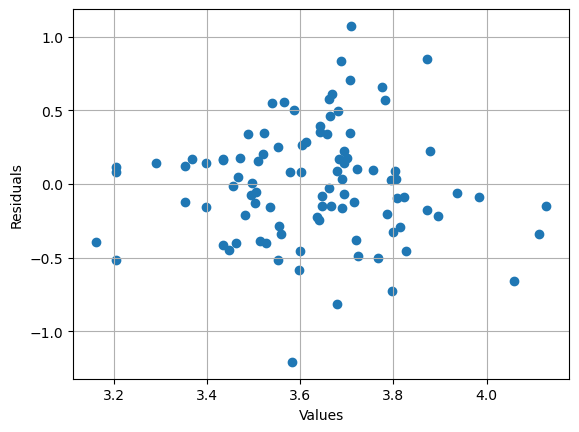

LWeight = 3.2303691516719897 + 0.16081972980227133 * LPSA


In [35]:
#Linear Regression for lpsa
model_lpsa = LinearRegression().fit(X_lpsa, y_lweight)
y_pred_lpsa = model_lpsa.predict(X_lpsa)

residuals_lpsa = data['lweight'] - y_pred_lpsa

plt.scatter(y_pred_lpsa, residuals_lpsa)
plt.xlabel('Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
print("LWeight =", model_lpsa.intercept_, "+", model_lpsa.coef_[0], "* LPSA")

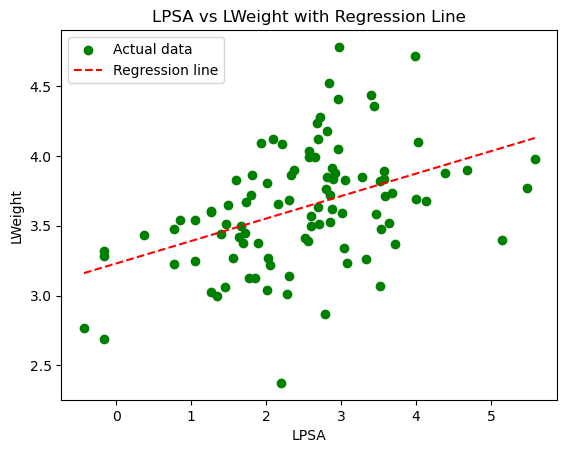

In [38]:
# lpsa plot
plt.scatter(X_lpsa, y_lweight, color='green', label='Actual data')
plt.plot(X_lpsa, y_pred_lpsa, color='red', linestyle='--', label='Regression line')
plt.xlabel('LPSA')
plt.ylabel('LWeight')
plt.title('LPSA vs LWeight with Regression Line')
plt.legend()

plt.show()

In [73]:
#PART a
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
sample_data = data.sample(n=97)
train_data, test_data = train_test_split(sample_data, test_size=0.1)

# Regression based on 'age'
model_age_sample = LinearRegression().fit(train_data[['age']], train_data['lweight'])

# Regression based on 'lpsa'
model_lpsa_sample = LinearRegression().fit(train_data[['lpsa']], train_data['lweight'])
age_pred_train = model_age_sample.predict(train_data[['age']])
lpsa_pred_train = model_lpsa_sample.predict(train_data[['lpsa']])

#Hypothesis Testing 
n_age_sample = len(train_data)
df_age_sample = n_age_sample - 2
df_lpsa_sample = n_age_sample - 2
mse_age_sample = mean_squared_error(train_data['lweight'], age_pred_train)
mse_lpsa_sample = mean_squared_error(train_data['lweight'], lpsa_pred_train)
age_residuals = train_data['lweight'] - age_pred_train
lpsa_residuals = train_data['lweight'] - lpsa_pred_train
se_age_sample = np.sqrt(mse_age_sample / np.sum((train_data['age'] - np.mean(train_data['age'])) ** 2))
se_lpsa_sample = np.sqrt(mse_lpsa_sample / np.sum((train_data['lpsa'] - np.mean(train_data['lpsa'])) ** 2))
t_age_sample = model_age_sample.coef_[0] / se_age_sample
t_lpsa_sample = model_lpsa_sample.coef_[0] / se_lpsa_sample
p_age_sample = 2 * (1 - stats.t.cdf(np.abs(t_age_sample), df_age_sample))
p_lpsa_sample = 2 * (1 - stats.t.cdf(np.abs(t_lpsa_sample), df_lpsa_sample))

print("p-value for age regression:", p_age_sample)

print("p-value for lpsa regression:", p_lpsa_sample)


p-value for age regression: 0.0003238552047466481
p-value for lpsa regression: 2.0726748604760203e-05


In [74]:
#Part b
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n_age_sample - 2)
ci_age_lower = model_age_sample.coef_[0] - t_critical * se_age_sample
ci_age_upper = model_age_sample.coef_[0] + t_critical * se_age_sample

ci_lpsa_lower = model_lpsa_sample.coef_[0] - t_critical * se_lpsa_sample
ci_lpsa_upper = model_lpsa_sample.coef_[0] + t_critical * se_lpsa_sample

print("CI for age:", ci_age_lower, ci_age_upper)
print("CI for lpsa:", ci_lpsa_lower, ci_lpsa_upper)

CI for age: 0.010249856246194745 0.03340817812006142
CI for lpsa: 0.09035352955144309 0.23290906210915557


In [94]:
#Part c
predictions_age = model_age_sample.predict(test_data[['age']])
predictions_lpsa = model_lpsa_sample.predict(test_data[['lpsa']])

#Part d
r_squared_age = r2_score(test_data['lweight'], predictions_age)
r_squared_lpsa = r2_score(test_data['lweight'], predictions_lpsa)

print("Age R2:", r_squared_age)
print("Lpsa R2:", r_squared_lpsa)

tolerance = 0.1
correct_predictions_age = np.sum(np.abs(predictions_age - test_data['lweight']) <= tolerance)
correct_predictions_lpsa = np.sum(np.abs(predictions_lpsa - test_data['lweight']) <= tolerance)
success_rate_age = np.sum(np.abs(predictions_age - test_data['lweight']) <= tolerance) / len(test_data) * 100
success_rate_lpsa = np.sum(np.abs(predictions_lpsa - test_data['lweight']) <= tolerance) / len(test_data) * 100

print("Age Success Rate:", success_rate_age)
print("Lpsa Success Rate:", success_rate_lpsa)


Age R2: -0.236429191147846
Lpsa R2: 0.11501071567257648
Age Success Rate: 10.0
Lpsa Success Rate: 40.0
